In [26]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from scipy import stats

In [28]:
df = pd.read_csv("global_edu_insights.csv")

In [30]:
df

,Country,Year,Region,GDP_per_capita,Education_Expenditure,Primary_Enrollment,Secondary_Enrollment,Tertiary_Enrollment,Literacy_Rate,Avg_Years_Schooling,Internet_Access,Pupil_Teacher_Ratio,Gender_Parity_Index,Unemployment_Rate,Government_Policy_Score
0,India,2015,South Asia,18973.71,4.29,98.2,90.2,31.5,82.7,12.7,75.3,17.7,1.05,5.6,5.1
1,Nigeria,2018,Africa,5935.70,2.00,86.4,69.4,19.8,88.1,7.7,31.8,27.3,0.98,7.2,3.2
2,Egypt,2017,Africa,-355.06,4.67,89.2,78.8,26.0,82.1,8.3,97.0,19.9,0.89,9.5,3.6
3,India,2023,South Asia,16670.91,2.00,88.4,77.0,46.1,86.7,9.3,54.0,12.6,0.93,5.6,8.1
4,Germany,2024,Europe,17748.95,2.00,96.6,71.1,24.8,91.1,11.6,78.6,15.8,0.97,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Kenya,2016,Africa,1396.31,4.19,89.3,65.5,38.2,72.2,9.4,59.2,22.9,1.10,8.5,10.0
9996,Australia,2021,Oceania,15932.28,7.11,83.0,78.5,29.2,88.4,10.2,76.7,23.7,1.02,3.5,7.2
9997,India,2017,South Asia,5290.88,3.20,97.4,76.9,20.3,72.0,9.7,55.7,17.3,1.07,6.9,8.0
9998,South Africa,2022,Africa,8726.83,2.18,85.9,83.3,51.9,91.0,7.8,88.8,22.7,1.10,9.1,5.2


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  10000 non-null  object 
 1   Year                     10000 non-null  int64  
 2   Region                   10000 non-null  object 
 3   GDP_per_capita           10000 non-null  float64
 4   Education_Expenditure    10000 non-null  float64
 5   Primary_Enrollment       10000 non-null  float64
 6   Secondary_Enrollment     10000 non-null  float64
 7   Tertiary_Enrollment      10000 non-null  float64
 8   Literacy_Rate            10000 non-null  float64
 9   Avg_Years_Schooling      10000 non-null  float64
 10  Internet_Access          10000 non-null  float64
 11  Pupil_Teacher_Ratio      10000 non-null  float64
 12  Gender_Parity_Index      10000 non-null  float64
 13  Unemployment_Rate        10000 non-null  float64
 14  Government_Policy_Score

In [34]:
df.describe()

,Year,GDP_per_capita,Education_Expenditure,Primary_Enrollment,Secondary_Enrollment,Tertiary_Enrollment,Literacy_Rate,Avg_Years_Schooling,Internet_Access,Pupil_Teacher_Ratio,Gender_Parity_Index,Unemployment_Rate,Government_Policy_Score
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2019.51200,12926.395549,4.512214,94.596210,74.859780,35.213050,84.776670,9.507320,60.070310,20.095360,0.998661,7.050090,5.989390
std,2.86794,9125.852740,1.415395,4.333091,9.920045,14.655766,9.428202,2.015383,19.412294,4.871982,0.095864,2.967915,1.957721
min,2015.00000,-27520.070000,2.000000,75.400000,37.900000,5.000000,50.000000,3.000000,10.000000,10.000000,0.800000,1.000000,0.000000
25%,2017.00000,7008.902500,3.477500,91.700000,68.100000,25.000000,78.300000,8.200000,46.600000,16.700000,0.930000,5.000000,4.700000
50%,2020.00000,13220.905000,4.480000,95.000000,74.900000,35.100000,85.100000,9.500000,60.400000,20.100000,1.000000,7.000000,6.000000
75%,2022.00000,19040.337500,5.490000,98.400000,81.700000,44.900000,91.700000,10.900000,73.700000,23.400000,1.070000,9.100000,7.300000
max,2024.00000,43844.730000,8.000000,100.000000,100.000000,90.400000,100.000000,15.000000,100.000000,38.600000,1.200000,18.300000,10.000000


In [36]:
missing_values = df.isnull().sum()
print(missing_values)

Country                    0
Year                       0
Region                     0
GDP_per_capita             0
Education_Expenditure      0
Primary_Enrollment         0
Secondary_Enrollment       0
Tertiary_Enrollment        0
Literacy_Rate              0
Avg_Years_Schooling        0
Internet_Access            0
Pupil_Teacher_Ratio        0
Gender_Parity_Index        0
Unemployment_Rate          0
Government_Policy_Score    0
dtype: int64


In [38]:
# Display the number of duplicate rows
duplicate_rows = df.duplicated().sum()
print(f'No. of Duplicate rows: {duplicate_rows}')

No. of Duplicate rows: 0


In [40]:
#Display the number of unique values in each column
unique_values = df.nunique()
print(unique_values)

Country                      20
Year                         10
Region                        9
GDP_per_capita             9987
Education_Expenditure       595
Primary_Enrollment          209
Secondary_Enrollment        535
Tertiary_Enrollment         717
Literacy_Rate               442
Avg_Years_Schooling         119
Internet_Access             875
Pupil_Teacher_Ratio         250
Gender_Parity_Index          41
Unemployment_Rate           161
Government_Policy_Score     101
dtype: int64


In [42]:
df["Year"] = pd.to_datetime(df["Year"], errors='coerce').dt.year

In [44]:
df.head()

,Country,Year,Region,GDP_per_capita,Education_Expenditure,Primary_Enrollment,Secondary_Enrollment,Tertiary_Enrollment,Literacy_Rate,Avg_Years_Schooling,Internet_Access,Pupil_Teacher_Ratio,Gender_Parity_Index,Unemployment_Rate,Government_Policy_Score
0,India,1970,South Asia,18973.71,4.29,98.2,90.2,31.5,82.7,12.7,75.3,17.7,1.05,5.6,5.1
1,Nigeria,1970,Africa,5935.70,2.00,86.4,69.4,19.8,88.1,7.7,31.8,27.3,0.98,7.2,3.2
2,Egypt,1970,Africa,-355.06,4.67,89.2,78.8,26.0,82.1,8.3,97.0,19.9,0.89,9.5,3.6
3,India,1970,South Asia,16670.91,2.00,88.4,77.0,46.1,86.7,9.3,54.0,12.6,0.93,5.6,8.1
4,Germany,1970,Europe,17748.95,2.00,96.6,71.1,24.8,91.1,11.6,78.6,15.8,0.97,8.0,8.0


In [46]:
# Calculate Q1 and Q3
Q1 = df['Literacy_Rate'].quantile(0.25)
Q3 = df['Literacy_Rate'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = df[(df['Literacy_Rate'] < lower_bound) | (df['Literacy_Rate'] > upper_bound)]

In [48]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers in '{col}':")
    print(outliers[[col]])


Outliers in 'GDP_per_capita':
      GDP_per_capita
333        -12622.49
457        -15074.45
490        -15229.35
568        -11716.29
656         37921.70
...              ...
9659       -19777.56
9750       -11666.94
9788       -16404.06
9941       -12535.62
9975       -11910.68

[96 rows x 1 columns]

Outliers in 'Education_Expenditure':
Empty DataFrame
Columns: [Education_Expenditure]
Index: []

Outliers in 'Primary_Enrollment':
      Primary_Enrollment
470                 80.8
516                 81.4
543                 81.5
814                 75.4
897                 79.9
952                 78.4
1221                78.7
1491                80.0
1670                81.6
1863                78.5
2258                79.7
2399                77.7
2466                77.9
2501                79.5
2681                80.6
2859                78.9
3346                80.5
3353                79.7
4276                78.4
5170                81.6
5456                81.0
5853        

In [50]:
# Function to winsorize a column
def winsorize_column(df, column, lower_quantile=0.05, upper_quantile=0.95):
    q_low = df[column].quantile(lower_quantile)
    q_high = df[column].quantile(upper_quantile)
    df[column + '_winsorized'] = np.where(df[column] < q_low, q_low,
                                          np.where(df[column] > q_high, q_high, df[column]))
    return df

# List of columns with outliers (based on your results)
columns_to_winsorize = [
    'GDP_per_capita',
    'Primary_Enrollment',
    'Secondary_Enrollment',
    'Tertiary_Enrollment',
    'Literacy_Rate',
    'Avg_Years_Schooling',
    'Pupil_Teacher_Ratio',
    'Unemployment_Rate',
    'Government_Policy_Score'
]

# Apply winsorization to each column
for col in columns_to_winsorize:
    df = winsorize_column(df, col)

In [52]:
# Add 1 to avoid log(0)
df['GDP_per_capita_log'] = np.log1p(df['GDP_per_capita_winsorized'])

C:\Users\malak\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [54]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Region_encoded'] = le.fit_transform(df['Region'])

In [56]:
df.to_csv("global_edu_insights_cleaned.csv", index=False)

In [58]:
print(df.columns.tolist())

['Country', 'Year', 'Region', 'GDP_per_capita', 'Education_Expenditure', 'Primary_Enrollment', 'Secondary_Enrollment', 'Tertiary_Enrollment', 'Literacy_Rate', 'Avg_Years_Schooling', 'Internet_Access', 'Pupil_Teacher_Ratio', 'Gender_Parity_Index', 'Unemployment_Rate', 'Government_Policy_Score', 'GDP_per_capita_winsorized', 'Primary_Enrollment_winsorized', 'Secondary_Enrollment_winsorized', 'Tertiary_Enrollment_winsorized', 'Literacy_Rate_winsorized', 'Avg_Years_Schooling_winsorized', 'Pupil_Teacher_Ratio_winsorized', 'Unemployment_Rate_winsorized', 'Government_Policy_Score_winsorized', 'GDP_per_capita_log', 'Region_encoded']


In [60]:
#Average metrics per region
region_avg = df.groupby('Region')[
    ['GDP_per_capita_winsorized', 'Literacy_Rate_winsorized', 'Unemployment_Rate_winsorized']
].mean().reset_index()

In [62]:
# Save region-wise average metrics
region_avg.to_csv('region_avg_metrics.csv', index=False)

In [64]:
#Melting
#Compare all enrollment types over years
enrollment = df[['Year', 'Primary_Enrollment_winsorized', 'Secondary_Enrollment_winsorized', 'Tertiary_Enrollment_winsorized']]
enrollment_melted = enrollment.melt(id_vars='Year', 
                                     var_name='Education_Level', 
                                     value_name='Enrollment_Rate')

In [66]:
# Save melted enrollment trends
enrollment_melted.to_csv('enrollment_over_years.csv', index=False)

In [68]:
#Concat
#Combine raw and normalized
raw_cols = df[['Country', 'Year', 'GDP_per_capita']]
normalized_cols = df[['GDP_per_capita_winsorized', 'GDP_per_capita_log']]
combined = pd.concat([raw_cols, normalized_cols], axis=1)

In [70]:
# Save combined raw and normalized GDP data
combined.to_csv('gdp_combined_raw_normalized.csv', index=False)


In [ ]:
#SQL

In [76]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("education_insights.db")
cursor = conn.cursor()

# Query 1: Create derived table (no need to store in DataFrame)
create_table_query = """
CREATE TABLE IF NOT EXISTS gdp_with_region AS
SELECT g.Country, g.Year, g.GDP_per_capita, g.GDP_per_capita_log, r.Region, r.GDP_per_capita_winsorized AS Region_Avg_GDP
FROM gdp_combined g
LEFT JOIN region_avg r ON g.Country = r.Region;
"""
cursor.execute(create_table_query)
conn.commit()  # commit when changing the DB

# Query 2: Average enrollment rate per level and year
query_avg_enrollment = """
SELECT Year, Education_Level, ROUND(AVG(Enrollment_Rate), 2) AS Avg_Enrollment
FROM enrollment_melted
GROUP BY Year, Education_Level;
"""
df_avg_enrollment = pd.read_sql_query(query_avg_enrollment, conn)

# Query 3: Top 10 countries by raw GDP per capita
query_top_gdp = """
SELECT Country, Year, GDP_per_capita
FROM gdp_combined
ORDER BY GDP_per_capita DESC
LIMIT 10;
"""
df_top_gdp = pd.read_sql_query(query_top_gdp, conn)


print("Average Enrollment by Year and Level:")
print(df_avg_enrollment)

print("\nTop 10 Countries by GDP per Capita:")
print(df_top_gdp)

Average Enrollment by Year and Level:
   Year                  Education_Level  Avg_Enrollment
0  1970    Primary_Enrollment_winsorized           94.70
1  1970  Secondary_Enrollment_winsorized           74.88
2  1970   Tertiary_Enrollment_winsorized           35.09

Top 10 Countries by GDP per Capita:
       Country  Year  GDP_per_capita
0       Canada  1970        43844.73
1       Mexico  1970        43819.32
2       Mexico  1970        42614.87
3  South Korea  1970        42215.00
4    Australia  1970        42195.06
5    Indonesia  1970        41448.98
6       Turkey  1970        41272.95
7    Argentina  1970        41069.64
8       France  1970        39889.34
9        Japan  1970        39825.61


In [78]:
df_avg_enrollment.to_csv("avg_enrollment_by_year.csv", index=False)
df_top_gdp.to_csv("top_gdp_countries.csv", index=False)

In [80]:
# Statistical summaries of GDP and Literacy
print(df[['GDP_per_capita', 'Literacy_Rate']].describe())

print("Median GDP:", df['GDP_per_capita'].median())
print("Variance of Literacy Rate:", df['Literacy_Rate'].var())

       GDP_per_capita  Literacy_Rate
count    10000.000000   10000.000000
mean     12926.395549      84.776670
std       9125.852740       9.428202
min     -27520.070000      50.000000
25%       7008.902500      78.300000
50%      13220.905000      85.100000
75%      19040.337500      91.700000
max      43844.730000     100.000000
Median GDP: 13220.905
Variance of Literacy Rate: 88.89099181027962


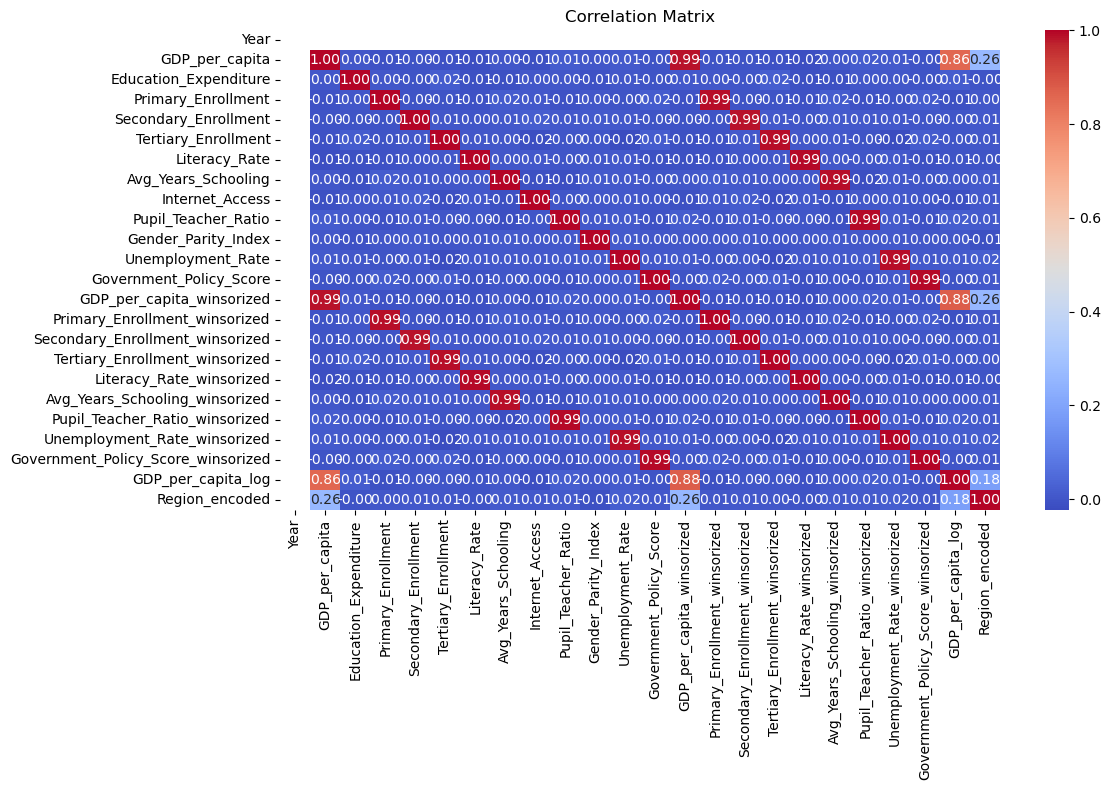

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

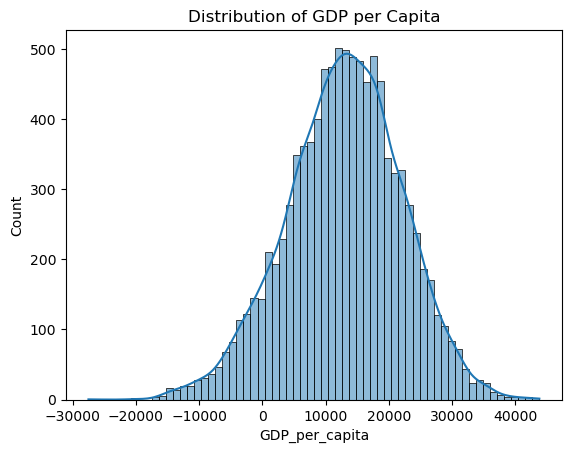

In [90]:
sns.histplot(df["GDP_per_capita"], kde=True)
plt.title("Distribution of GDP per Capita")
plt.show()

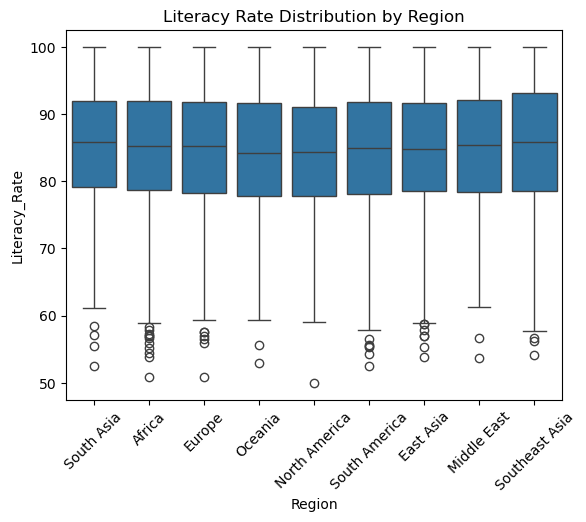

In [92]:
sns.boxplot(x="Region", y="Literacy_Rate", data=df)
plt.xticks(rotation=45)
plt.title("Literacy Rate Distribution by Region")
plt.show()

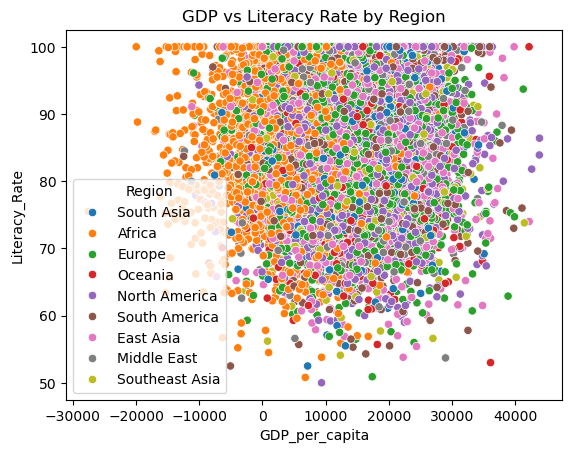

In [94]:
sns.scatterplot(data=df, x="GDP_per_capita", y="Literacy_Rate", hue="Region")
plt.title("GDP vs Literacy Rate by Region")
plt.show()

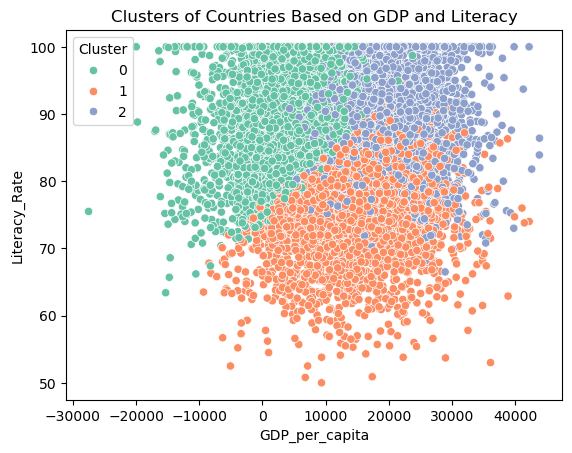

In [102]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features
features = df[['GDP_per_capita', 'Literacy_Rate', 'Unemployment_Rate']].dropna()

# Normalize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
sns.scatterplot(data=df, x='GDP_per_capita', y='Literacy_Rate', hue='Cluster', palette='Set2')
plt.title("Clusters of Countries Based on GDP and Literacy")
plt.show()

In [106]:
# Main cleaned dataset
df.to_csv("final_global_education_data.csv", index=False)

# Region averages
region_avg.to_csv("region_avg.csv", index=False)

# Enrollment melted
enrollment_melted.to_csv("enrollment_melted.csv", index=False)

# Optional: Clustering results
df[['Country', 'Year', 'GDP_per_capita', 'Literacy_Rate', 'Cluster']].to_csv("clusters.csv", index=False)
